In [1]:
import time
import warnings
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from six import StringIO
from sklearn import tree

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('clean_train.csv')
df_test = pd.read_csv('clean_test.csv')

In [3]:
df.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,date_recordedIs_month_start_False,date_recordedIs_month_start_True,date_recordedIs_quarter_end_False,date_recordedIs_quarter_end_True,date_recordedIs_quarter_start_False,date_recordedIs_quarter_start_True,date_recordedIs_year_end_False,date_recordedIs_year_start_False,date_recordedIs_year_start_True,status_group
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,1,0,1,0,1,0,1,1,0,functional
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,1,0,1,0,1,0,1,1,0,functional
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,1,0,1,0,1,0,1,1,0,functional
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,1,0,1,0,1,0,1,1,0,non functional
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,1,0,1,0,1,0,1,1,0,functional


In [4]:
df['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [5]:
df_test.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,date_recordedIs_month_end_False,date_recordedIs_month_end_True,date_recordedIs_month_start_False,date_recordedIs_month_start_True,date_recordedIs_quarter_end_False,date_recordedIs_quarter_end_True,date_recordedIs_quarter_start_False,date_recordedIs_quarter_start_True,date_recordedIs_year_end_False,date_recordedIs_year_start_False
0,50785,0.0,1996,35.290799,-4.059696,0,21,3,321,2012,...,1,0,1,0,1,0,1,0,1,1
1,51630,0.0,1569,36.656709,-3.309214,0,2,2,300,2000,...,1,0,1,0,1,0,1,0,1,1
2,17168,0.0,1567,34.767863,-5.004344,0,13,2,500,2010,...,1,0,0,1,1,0,1,0,1,1
3,45559,0.0,267,38.058046,-9.418672,0,80,43,250,1987,...,1,0,1,0,1,0,1,0,1,1
4,49871,500.0,1260,35.006123,-10.950412,0,10,3,60,2000,...,1,0,1,0,1,0,1,0,1,1


In [6]:
df.shape, df_test.shape

((59400, 201), (14850, 197))

In [7]:
# train and test are different shapes. Find which columns are different.
df.columns.difference(df_test.columns)

Index(['date_recordedIs_year_start_True',
       'extraction_type_other - mkulima/shinyanga', 'scheme_management_None',
       'status_group'],
      dtype='object')

In [8]:
df_test.columns.difference(df.columns)

Index([], dtype='object')

In [9]:
# Drop columns that are different excluding the target(status_group)
df.drop(columns = ['date_recordedIs_year_start_True',
       'extraction_type_other - mkulima/shinyanga', 'scheme_management_None'], inplace=True)

In [10]:
df.shape, df_test.shape

((59400, 198), (14850, 197))

In [11]:
X = df.drop(columns = ['id', 'status_group']).values
y = df['status_group'].values

LabelEncoder: transforms the labels into numerical values mn 8eir order

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to the target labels
y = label_encoder.fit_transform(y)

# Check the mapping of labels to numerical values
print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# y_encoded now contains the numerical representation of the target labels
print("Encoded labels:", y)


Label mapping: {'functional': 0, 'functional needs repair': 1, 'non functional': 2}
Encoded labels: [0 0 0 ... 0 0 0]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [14]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (44550, 196) (44550,)
Testing set:  (14850, 196) (14850,)


In [15]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10).fit(X_train, y_train) #tried from k=4 
dtc

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [16]:
yhat = dtc.predict(X_test)

In [17]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7550617283950617
Test set Accuracy:  0.7372390572390572


In [18]:
dot_data = StringIO()
filename = 'pumptree.png'
featureNames = df.columns[0:196]
targetNames = df['status_group']
out = tree.export_graphviz(dtc, feature_names=featureNames, 
                           out_file=dot_data, 
                           class_names=np.unique(y_train), 
                           filled=True, 
                           special_characters=True, 
                           rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: can only concatenate str (not "numpy.int32") to str

In [19]:
# Create a confusion matrix for K=1 model.
print(classification_report(y_test, yhat))
pd.DataFrame(confusion_matrix(y_test, yhat), columns=['Pred +', 'Pred Fix', 'Pred -'], index=['Act +', 'Pred Fix', 'Act -'])

              precision    recall  f1-score   support

           0       0.71      0.90      0.80      8008
           1       0.55      0.14      0.22      1062
           2       0.81      0.62      0.70      5780

    accuracy                           0.74     14850
   macro avg       0.69      0.55      0.57     14850
weighted avg       0.74      0.74      0.72     14850



,Pred +,Pred Fix,Pred -
Act +,7214,70,724
Pred Fix,782,147,133
Act -,2141,52,3587


In [20]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=None).fit(X_train, y_train)

In [21]:
yhatRF = rfc.predict(X_test)

In [22]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhatRF))

Train set Accuracy:  0.9977553310886644
Test set Accuracy:  0.8049158249158249


In [23]:
rtc = RandomForestClassifier(random_state=42)
param_grid = {
     'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

Best Parameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=20,min_samples_leaf= 10,min_samples_split= 10 ).fit(X_train, y_train)

In [ ]:
yhatRF = rfc.predict(X_test)

In [ ]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhatRF))

Train set Accuracy:  0.8072727272727273
Test set Accuracy:  0.7917171717171717


In [27]:
rfc1 = RandomForestClassifier(criterion= 'gini', max_depth= 50, min_samples_split= 10, n_estimators=150).fit(X_train, y_train)

In [28]:
yhatRF1 = rfc1.predict(X_test)
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rfc1.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhatRF1))

Train set Accuracy:  0.8976879910213243
Test set Accuracy:  0.8150841750841751


In [29]:
dtc = DecisionTreeClassifier(random_state=42)

# Define parameter grid for GridSearchCV, including 'criterion'
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

KeyboardInterrupt: 

In [ ]:
dtc_best = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 10, min_samples_split= 2, random_state=42)
dtc_best.fit(X_train, y_train)

# Predict on training and test sets
# y_train_pred = dtc_best.predict(X_train)
yhat = dtc_best.predict(X_test)

print('Train set Accuracy: ', metrics.accuracy_score(y_train, dtc_best.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8300785634118968
Test set Accuracy:  0.7674747474747474


In [ ]:

rfc_params = {'n_estimators':[2,5,10,20,50,75,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[2,5,10,20,50,None],
              'min_samples_split':[2,5,10,20]}


grid_rfc = GridSearchCV(RandomForestClassifier(), 
                        rfc_params, 
                        cv=5, 
                        scoring='accuracy').fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      8008
           1       0.68      0.19      0.29      1062
           2       0.86      0.71      0.78      5780

    accuracy                           0.79     14850
   macro avg       0.77      0.61      0.64     14850
weighted avg       0.79      0.79      0.78     14850

Confusion matrix, without normalization
[[7456   56  496]
 [ 699  197  166]
 [1645   35 4100]]


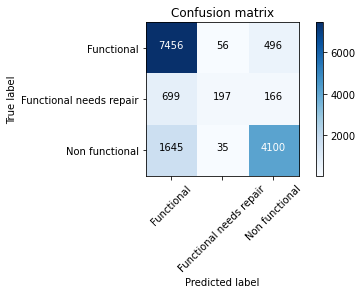

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhatRF)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhatRF))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Functional',
                                           'Functional needs repair', 
                                           'Non functional'],
                                            normalize= False,
                                            title='Confusion matrix')

In [30]:
X2 = df_test.drop(columns = ['id']).values

In [31]:
X2

array([[0.00000000e+00, 1.99600000e+03, 3.52907992e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.56900000e+03, 3.66567089e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.56700000e+03, 3.47678631e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.47600000e+03, 3.47398045e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 9.98000000e+02, 3.54327317e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 4.81000000e+02, 3.47650545e+01, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [32]:
yhat1 = rfc1.predict(X2)
preds1 = pd.DataFrame(yhat1)
preds1.head()

,0
0,0
1,0
2,0
3,2
4,0


In [33]:
predict1 = pd.concat((df_test['id'], preds1), axis=1)
predict1.columns=['id', 'status_group']
predict1['status_group'].unique()

array([0, 2, 1])

In [34]:
predict1.head()

,id,status_group
0,50785,0
1,51630,0
2,17168,0
3,45559,2
4,49871,0


In [35]:
predict1.tail()

,id,status_group
14845,39307,2
14846,18990,0
14847,28749,0
14848,33492,0
14849,68707,2


In [36]:
ordinal_order = ['functional', 'functional needs repair', 'non functional']

# Assuming your data is stored in a DataFrame named df and the column is 'status_group'
predict1['status_group'] = predict1['status_group'].map({0: ordinal_order[0], 1: ordinal_order[1], 2: ordinal_order[2]})

In [37]:
predict1.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [38]:
predict1.tail()

,id,status_group
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional
14849,68707,non functional


In [39]:
predict1.to_csv('Submission_1.csv', index=False)

In [ ]:
yhat2 = rfc.predict(X2)

In [ ]:
preds = pd.DataFrame(yhat2)

In [ ]:
preds.head()

,0
0,2
1,0
2,0
3,2
4,0


In [ ]:
df_test.shape, preds.shape

((14850, 197), (14850, 1))

In [ ]:
predict = pd.concat((df_test['id'], preds), axis=1)

In [ ]:
predict.columns=['id', 'status_group']

In [ ]:
predict['status_group'].unique()

array([2, 0, 1])

In [ ]:
predict.head()

,id,status_group
0,50785,2
1,51630,0
2,17168,0
3,45559,2
4,49871,0


In [ ]:
predict.tail()

,id,status_group
14845,39307,2
14846,18990,0
14847,28749,0
14848,33492,0
14849,68707,2


In [ ]:
predict.to_csv('Submission_2.csv', index=False)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize XGBClassifier with chosen hyperparameters
xgb = XGBClassifier(
    learning_rate=0.6,
    max_depth=7,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100,
    objective='binary:logistic',
    random_state=42
)

# Fit XGBClassifier to the training data
xgb.fit(X_train, y_train)

# Predict on the test set
y_test_pred = xgb.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

print("XGBoost Test set Accuracy: ", test_accuracy)


XGBoost Test set Accuracy:  0.8095622895622896


In [ ]:
yhat3 = xgb.predict(X2)
preds2 = pd.DataFrame(yhat3)
preds2.head()


In [ ]:
predict2 = pd.concat((df_test['id'], preds2), axis=1)

In [ ]:
predict2.columns=['id', 'status_group']

In [ ]:
predict2['status_group'].unique()

In [ ]:
predict2.head()

In [ ]:
predict2.to_csv('Submission_3.csv', index=False)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingClassifier

# # Define the parameter grid with reduced range
# params = {
#     'learning_rate': [0.075, 0.1, 0.2],
#     'max_depth': [10, 15],
#     'min_samples_leaf': [10, 20],
#     'max_features': [0.5, 0.8, 1.0],
#     'n_estimators': [50, 100]
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=GradientBoostingClassifier(),
#     param_distributions=params,
#     n_iter=10,  # Number of parameter settings that are sampled
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Get the best parameters from RandomizedSearchCV
# best_params = random_search.best_params_
# print("Best Parameters: ", best_params)

# # Get the best estimator from RandomizedSearchCV
# best_model = random_search.best_estimator_

# # Predict on the test set
# y_test_pred = best_model.predict(X_test)

# # Calculate accuracy
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print("Gradient Boosting Test set Accuracy: ", test_accuracy)


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# # Define the parameter grid with reduced range
# params = {
#     'learning_rate': [0.075, 0.1, 0.2],
#     'max_depth': [10, 15],
#     'min_samples_leaf': [10, 20],
#     'max_features': [0.5, 0.8, 1.0],
#     'n_estimators': [50, 100]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=GradientBoostingClassifier(),
#     param_grid=params,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # # Fit RandomizedSearchCV
# # random_search.fit(X_train, y_train)
# # params = {'learning_rate': [0.075, 0.7],
# #           'max_depth': [13, 14],
# #           'min_samples_leaf': [15, 16],
# #           'max_features': [1.0],
# #           'n_estimators': [100, 200]} 


# # grid_grad = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='accuracy')
# # grid_grad.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# best_params = grid_search.best_params_
# print("Best Parameters: ", best_params)

# # Get the best estimator from RandomizedSearchCV
# best_model = grid_search.best_estimator_

# # Predict on the test set
# y_test_pred = best_model.predict(X_test)

# # Calculate accuracy
# test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# print("Gradient Boosting Test set Accuracy: ", test_accuracy)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'